In [30]:
import time
import requests
from bs4 import BeautifulSoup

In [31]:
url = "https://feeds.feedburner.com/zdkorea"
res = requests.get(url)
raw_data = []
parsed_data = []

if res.status_code == 200:
    xml_data = res.text
    soup = BeautifulSoup(xml_data, 'xml')
    description = soup.find_all('description')
    raw_data.append(description)
else:
    print('Failed to get data')

In [33]:
for data in raw_data[0]:
    parsed = data.text
    parsed_data.append(parsed)

In [34]:
new_data = []

for data in parsed_data:
    parsed = data.replace("[지디넷코리아]", "").replace("지디넷코리아", "")
    new_data.append(parsed)

In [35]:
new_data

['전체기사 - IT세상을 바꾸는 힘 ',
 'IT 세상을 바꾸는 힘 - ',
 '가수 거미가 남편인 배우 조정석과의 러브 스토리를 공개했다.28일 오후9시 방송되는 SBS TV 예능물 \'신발벗고 돌싱포맨\'(이하 \'돌싱포맨\')에 거미와 가수 김범수가 게스트로 출연한다.두 사람은 음악 업적을 되짚어봤다. 대한민국 최초로 싸이, 그룹 \'방탄소년단\'(BTS)보다 먼저 빌보드에 올랐던 김범수는 과거 옆모습으로 인터뷰해야 했던 설움 폭발 사연을 공개했다. \'OST 여왕\' 거미는 지금까지 참여한 드라마의 합산 시청률이 무려 150%를 넘는다고 밝혔다.20년 넘게 열애설 난 적이 없다는 김범수는 철저한 비밀연애 비법과 반전 사랑법을 공개했다. 연애만 하면 애교쟁이로 돌변한다는 그는 애인 앞에서 "혀가 신생아 수준으로 짧아진다"고 밝혀 모두를 놀라게 했다. "싱글일 때는 이성이 조금만 잘해줘도 설렌다"며 착각병 말기 증상도 호소해 웃음을 안겼다.거미는 "이런 이야기는 방송에서 처음 한다"며 조정석과 썸 타던 시절에 서로의 마음을 확인하게 된 순간, 조정석의 상남자 같은 모습에 반하게 된 일화를 공개했다. 김범수와 거미는 완벽한 듀엣 무대도 선보였다.한편 조정석과 거미는 2013년 지인의 소개로 만나 연인 관계로 발전했다. 5년간 열애 끝에 2018년 결혼했으며 2020년 딸을 품었다.제공=뉴시스',
 '가수 이효리가 투병 중인 아버지와 산책에 나선 근황이 공개됐다.28일 이효리의 친언니는 인스타그램에 "잠깐 짬 내서 온 막내랑 겨울산책을 나서신 아빠, 아프실 때 빼고 365일 하루도 거르지 않으시는 서울대공원 산책길에 같이"라는 글과 함께 사진을 게시했다.사진 속에는 아버지와 함께 다정하게 산책 중인 이효리의 모습이 담겼다. 베이지색 바지에 패딩을 매치한 이효리의 패션과 아버지에 대한 마음까지 엿볼 수 있어 시선을 끈다.앞서 이효리는 지난해 12월 방송된 tvN \'캐나타 체크인\'에서 아버지의 투병 사실을 전하면서 어머니가 아버지를 간병하면서 힘든 상황이라고

In [36]:
from konlpy.tag import Hannanum
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [37]:
words = []
han = Hannanum()
for data in new_data:
    nouns = han.nouns(data)
    words.extend(nouns)

print(len(words))

6080


In [38]:
words

['전체기사',
 '세상',
 '힘',
 '세상',
 '힘',
 '가수',
 '거미',
 '남편',
 '배우',
 '조정석',
 '러브',
 '스토리',
 '공개',
 '28일',
 '오후9시',
 '방송',
 '예능물',
 '신발벗',
 "돌싱포맨'(이하",
 "'돌싱포맨')",
 '거미',
 '가수',
 '김범수',
 '게스트',
 '출연',
 '두',
 '사람',
 '음악',
 '업적',
 '되짚어봤다',
 '대한민국',
 '최초',
 '그룹',
 '방탄소년단',
 '빌보드',
 '김범수',
 '과거',
 '옆모습',
 '인터뷰해',
 '설움',
 '폭발',
 '사연',
 '공개',
 '여왕',
 '거미',
 '참여',
 '드라마',
 '합산',
 '시청률',
 '150',
 '20년',
 '열애설',
 '적',
 '김범수',
 '철저',
 '비밀연애',
 '비법',
 '반전',
 '사랑법',
 '공개',
 '연애',
 '애교쟁이',
 '돌변',
 '그',
 '애',
 '앞',
 '혀',
 '신생아',
 '수준',
 '모두',
 '싱글',
 '때',
 '이성',
 '설렌다"며',
 '착각병',
 '증상',
 '호소',
 '웃음',
 '거미',
 '이야기',
 '방송',
 '한다"며',
 '조정석',
 '시절',
 '서로',
 '마음',
 '확인',
 '순간',
 '조정석',
 '상남자',
 '모습',
 '일화',
 '공개',
 '김범수',
 '거미',
 '완벽',
 '듀엣',
 '무대',
 '한편',
 '조정석',
 '거미',
 '2013년',
 '지인',
 '소개',
 '연인',
 '관계',
 '발전',
 '5년',
 '열애',
 '끝',
 '2018년',
 '결혼',
 '2020년',
 '딸',
 '제공=뉴시스',
 '가수',
 '이효리',
 '투병',
 '중',
 '아버지',
 '산책',
 '근황',
 '공개',
 '28일',
 '이효리',
 '친언니',
 '인스타그램',
 '짬',
 '내',
 '막내',
 '겨울산책',
 '아빠',
 '때',
 '

In [39]:
counter = Counter(words)
print(counter)

Counter({'등': 74, '것': 63, '수': 59, '서비스': 34, '기술': 34, '이': 32, '기업': 30, '사업': 30, '진행': 29, '시장': 28, '말': 26, '미디어아트': 24, '28일': 23, '유산': 22, '중': 20, '지역': 20, '디지털': 20, '솔루션': 20, '대표': 19, '제공': 18, '제품': 18, '이벤트': 18, '이사장': 16, '활용': 16, '콘텐츠': 16, '대상': 16, '개발': 15, '확대': 15, '올해': 15, '그': 14, '다양한': 14, '필요': 14, '이번': 14, '예정': 14, '추진': 14, '내': 13, '카카오': 13, '문제': 13, '설명': 13, '국내': 13, '개최': 13, '고객': 13, '대': 13, '중국': 13, '발전': 12, '과정': 12, '전': 12, '저': 12, '이후': 12, '성장': 12, '만큼': 12, '내년': 12, '문화유산': 12, '시범사업': 12, '부': 11, '선정': 11, '소프트웨어': 11, '글로벌': 11, '관련': 11, '감소': 11, '관리': 11, '냄새': 11, '김범수': 10, '9월': 10, '대비': 10, '산업': 10, '사용': 10, '기반': 10, '구축': 10, '햇반솥반': 10, '활성화': 10, '백제': 10, '수요': 10, '생산': 10, '한컴': 10, '회사': 9, '운영': 9, '문화': 9, '계획': 9, '나': 9, '브랜드': 9, '발표': 9, '가치': 9, '시스템': 9, '환경': 9, '관계자': 9, '구성': 9, '방문': 9, '노력': 9, '10월': 9, '데이터': 9, '판매': 9, '참여': 8, '지난해': 8, '창업자': 8, '달': 8, '이상': 8, '설립': 8, '있다”고': 8, '규모': 

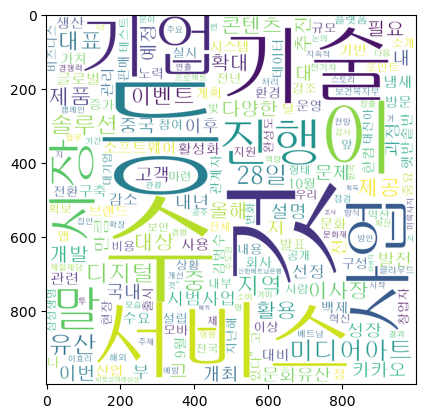

In [40]:
wordcloud = WordCloud( 
    font_path = "C:\Windows\Fonts/H2GPRM.TTF",
    background_color = "white",
    width = 1000,
    height = 1000)
img = wordcloud.generate_from_frequencies(counter)
plt.imshow(img)
